In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# 데이터
df = pd.read_csv(
    r"C:\ai\lecNote\1st_Project\data\서울_일반음식점_전처리_폐업률머지.csv",
    low_memory=False
)

# 타겟
y = df["폐업률_3년이내_pct"]

# ===============================
# 📌 모델에 넣을 전체 피처 집합
# ===============================
X = df[
    [
        "업태_그룹",
        "구"                 
    ]
]



In [3]:

# ===============================
# 📌 범주형 컬럼 정의
# ===============================
cat_cols = [
    "업태_그룹",
    "구"      
]


# ===============================
# 📌 전처리 파이프라인 정의
# ===============================
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

In [4]:
# ===============================
# 📌 학습 / 테스트 데이터 분리
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [5]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(
        steps=[
        ("preprocess", preprocess),
        ("model", RandomForestRegressor(
            n_estimators=200,   # 트리 개수 (많을수록 안정적)
            max_depth=15,     # 트리 깊이
            random_state=42,   # 재현성
            n_jobs=-1          # CPU 전부 사용 (속도 ↑)
        ))
        ]
)

rf_model.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['업태_그룹', '구'])])),
                ('model',
                 RandomForestRegressor(max_depth=15, n_estimators=200,
                                       n_jobs=-1, random_state=42))])

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE : {mae:.2f}%")
print(f"RMSE: {rmse:.2f}%")




MAE : 0.60%
RMSE: 1.09%


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False


# 🔹 전처리 객체 가져오기
preprocess_fitted = rf_model.named_steps["preprocess"]

# 🔹 OneHotEncoder에서 생성된 컬럼명
cat_features = preprocess_fitted.named_transformers_["cat"] \
    .get_feature_names_out(cat_cols)

# 🔹 최종 전체 피처명
feature_names =  list(cat_features)


In [8]:
# 🔹 RandomForest 모델
rf = rf_model.named_steps["model"]

# 🔹 중요도 DataFrame
importances = pd.DataFrame({
    "feature": feature_names,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

importances.head(10)


,feature,importance
1,업태_그룹_분식/간편식,0.347544
29,구_종로구,0.142453
8,구_강동구,0.078238
27,구_용산구,0.066526
0,업태_그룹_기타,0.055055
30,구_중구,0.032235
7,구_강남구,0.031905
25,구_양천구,0.031291
26,구_영등포구,0.026578
6,업태_그룹_한식,0.026382


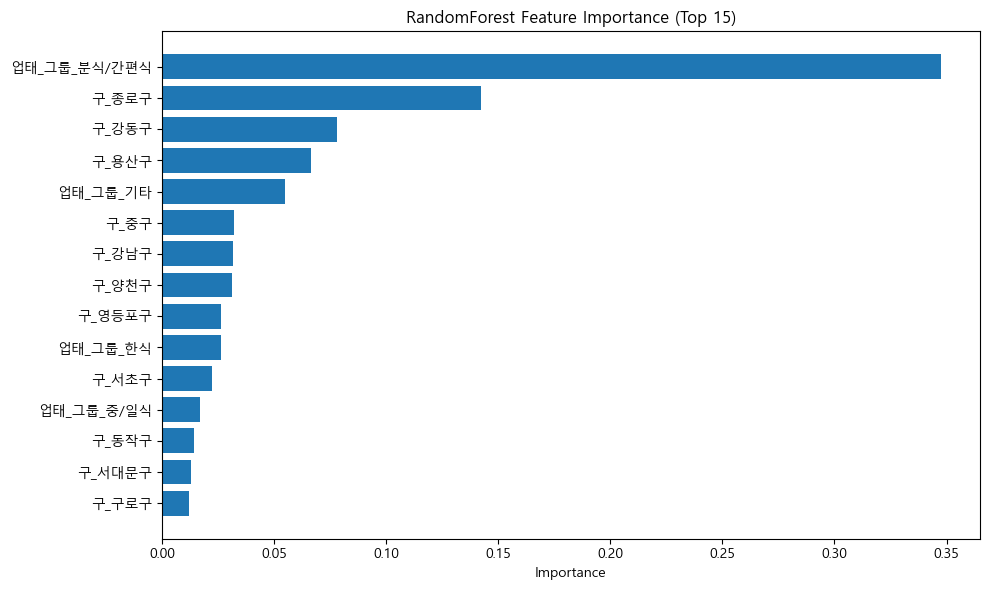

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(
    importances.head(15)["feature"][::-1],
    importances.head(15)["importance"][::-1]
)
plt.title("RandomForest Feature Importance (Top 15)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [10]:
pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---- ----------------------------------- 7.6/72.0 MB 39.0 MB/s eta 0:00:02
   ----- ---------------------------------- 9.4/72.0 MB 41.9 MB/s eta 0:00:02
   -------- ------------------------------- 14.7/72.0 MB 27.9 MB/s eta 0:00:03
   ---------- ----------------------------- 18.9/72.0 MB 22.9 MB/s eta 0:00:03
   --------------- ------------------------ 28.0/72.0 MB 27.3 MB/s eta 0:00:02
   ---------------------- ----------------- 39.8/72.0 MB 32.5 MB/s eta 0:00:01
   ---------------------------- ----------- 51.4/72.0 MB 35.9 MB/s eta 0:00:01
   ---------------------------- ----------- 51.4/72.0 MB 35.9 MB/s eta 0:00:01
   ------------------------------- -------- 56.6/72.0 MB 30.6 MB/s eta 0:00:01
   ---------------------------------- ----- 61.6/72.0 MB 30.0 MB/s eta 0:00:01
   ---------------------------------------  70.3/72.0 MB 31.8 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 30.0 M

In [11]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

xgb_model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", XGBRegressor(
            n_estimators=500,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1
        ))
    ]
)


In [12]:
xgb_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['업태_그룹', '구'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_typ...hts=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 🔹 RandomForest
rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

# 🔹 XGBoost
xgb_pred = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)

print("📌 RandomForest")
print(f"MAE : {rf_mae:.2f}%")
print(f"RMSE: {rf_rmse:.2f}%")

print("\n📌 XGBoost")
print(f"MAE : {xgb_mae:.2f}%")
print(f"RMSE: {xgb_rmse:.2f}%")


📌 RandomForest
MAE : 0.60%
RMSE: 1.09%

📌 XGBoost
MAE : 0.05%
RMSE: 0.07%


In [14]:
# ===============================
# 📌 RandomForest 예측
# ===============================
rf_pred = rf_model.predict(X_test)

# ===============================
# 📌 XGBoost 예측
# ===============================
xgb_pred = xgb_model.predict(X_test)

# 결과 확인
print("RF 예측값 샘플:", rf_pred[:5])
print("XGB 예측값 샘플:", xgb_pred[:5])


RF 예측값 샘플: [33.30285885 33.30285885 47.5        35.07094927 31.60420283]
XGB 예측값 샘플: [31.21189  33.386524 47.48903  34.897358 29.386597]


In [15]:
# ===============================
# 📌 실제값 vs 예측값 비교
# ===============================
result_df = X_test.copy()

result_df["실제_폐업률"] = y_test
result_df["RF_예측_폐업률"] = rf_pred
result_df["XGB_예측_폐업률"] = xgb_pred

# 🔹 출력용 컬럼 (% 붙인 문자열)
for col in ["실제_폐업률", "RF_예측_폐업률", "XGB_예측_폐업률"]:
    result_df[col + "_표시"] = result_df[col].map(lambda x: f"{x:.2f}%")

result_df.head()


,업태_그룹,구,실제_폐업률,RF_예측_폐업률,XGB_예측_폐업률,실제_폐업률_표시,RF_예측_폐업률_표시,XGB_예측_폐업률_표시
72712,한식,성동구,31.2,33.302859,31.211889,31.20%,33.30%,31.21%
204272,한식,노원구,33.4,33.302859,33.386524,33.40%,33.30%,33.39%
14142,분식/간편식,양천구,47.5,47.500000,47.489029,47.50%,47.50%,47.49%
132783,기타,송파구,34.8,35.070949,34.897358,34.80%,35.07%,34.90%
148751,양식/외식,성동구,29.3,31.604203,29.386597,29.30%,31.60%,29.39%


In [16]:
# ===============================
# 📌 실제 예측용 입력 데이터 (1건)
# ===============================
new_data = pd.DataFrame([
    {
        "업태_그룹": "분식/간편식",
        "구": "강동구"
    }
])


In [17]:
# ===============================
# 📌 폐업률 예측 (실제 미래 예측)
# ===============================
rf_future_pred = rf_model.predict(new_data)
xgb_future_pred = xgb_model.predict(new_data)


In [21]:
# ===============================
# 📌 예측 결과 테이블
# ===============================
result_pred = new_data.copy()

result_pred["RF_예측_폐업률"] = rf_future_pred
result_pred["XGB_예측_폐업률"] = xgb_future_pred

# 🔹 출력용 컬럼 (% 문자열)
for col in ["RF_예측_폐업률", "XGB_예측_폐업률"]:
    result_pred[col + "_표시"] = result_pred[col].map(lambda x: f"{x:.2f}%")

result_pred


,업태_그룹,구,RF_예측_폐업률,XGB_예측_폐업률,RF_예측_폐업률_표시,XGB_예측_폐업률_표시
0,분식/간편식,강동구,52.0,51.984688,52.00%,51.98%


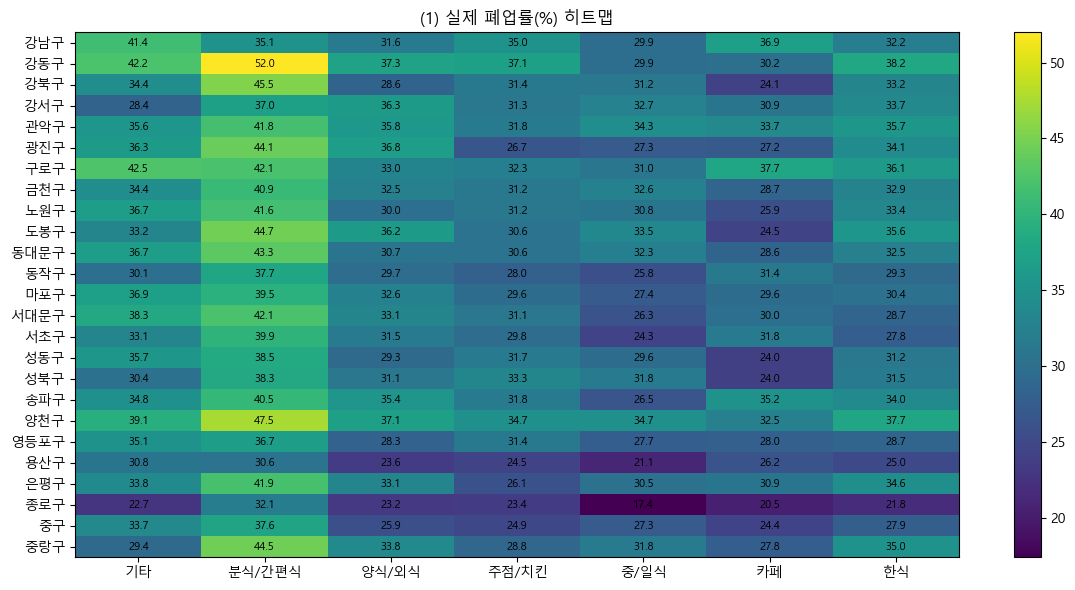

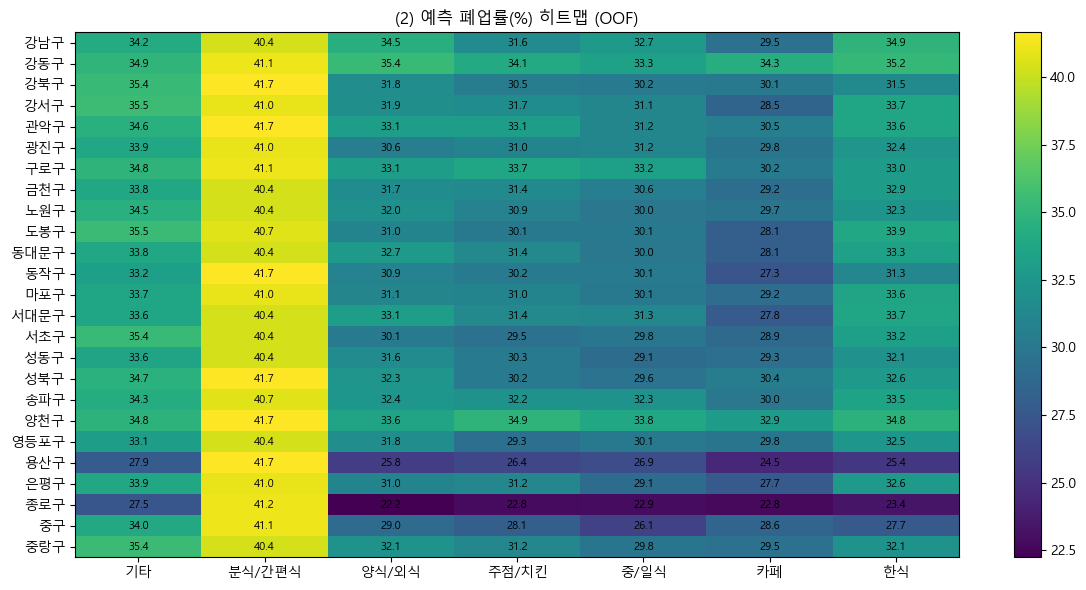

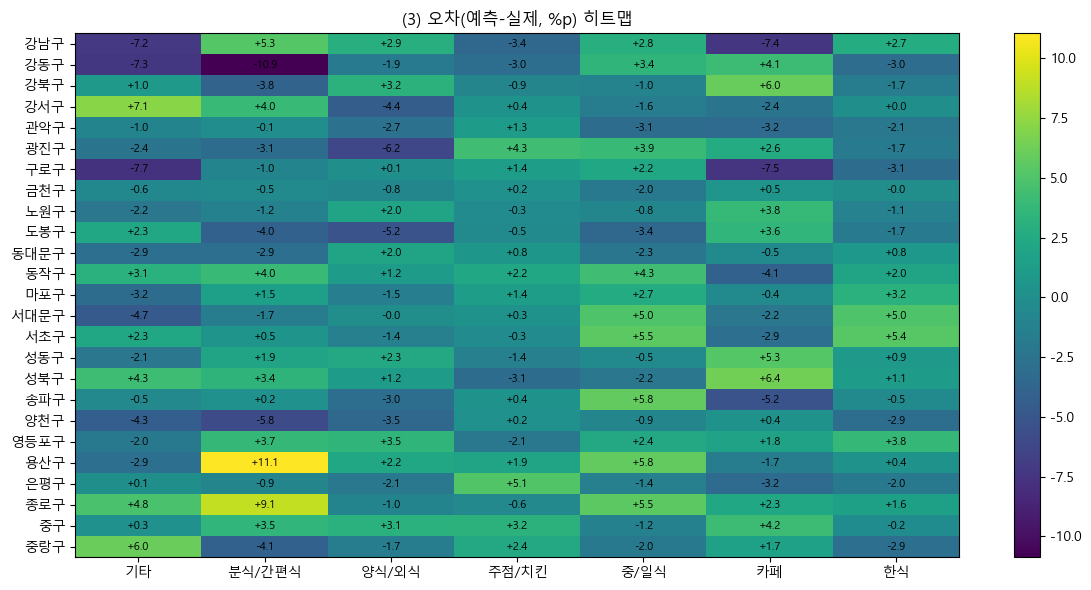

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# =========================
# 1) 로드 + (구,업태) 유니크 집계
# =========================
path = "data/서울_일반음식점_전처리_폐업률머지.csv"
df = pd.read_csv(path, low_memory=False)

# (구, 업태_그룹) 조합별 실제 폐업률/표본수 1행으로 만들기
g = (df[["구", "업태_그룹", "표본수", "폐업률_3년이내_pct"]]
     .dropna()
     .groupby(["구", "업태_그룹"], as_index=False)
     .agg(표본수=("표본수", "first"),
          actual=("폐업률_3년이내_pct", "first"))
)

# (선택) 표본수 너무 적은 조합 제외 (노이즈 줄이기)
min_n = 30
g = g[g["표본수"] >= min_n].copy()

X = g[["업태_그룹", "구"]]
y = g["actual"].astype(float)

# =========================
# 2) 모델(너 노트북과 동일 컨셉) + OOF 예측 만들기
# =========================
cat_cols = ["업태_그룹", "구"]

preprocess = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)]
)

base_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline(steps=[("preprocess", preprocess), ("model", base_model)])

# OOF(교차검증) 예측: 각 샘플은 자기 자신을 학습에 포함하지 않은 모델로 예측됨
kf = KFold(n_splits=5, shuffle=True, random_state=42)
pred_oof = np.empty(len(g), dtype=float)

for tr_idx, va_idx in kf.split(X):
    pipe.fit(X.iloc[tr_idx], y.iloc[tr_idx])
    pred_oof[va_idx] = pipe.predict(X.iloc[va_idx])

g["pred"] = pred_oof
g["error"] = g["pred"] - g["actual"]

# =========================
# 3) 히트맵용 pivot 만들기
# =========================
# 보기 좋게 정렬(원하는 순서가 있으면 여기서 커스텀)
g = g.sort_values(["구", "업태_그룹"]).copy()

pv_actual = g.pivot(index="구", columns="업태_그룹", values="actual")
pv_pred   = g.pivot(index="구", columns="업태_그룹", values="pred")
pv_err    = g.pivot(index="구", columns="업태_그룹", values="error")

# =========================
# 4) 히트맵 그리기 함수
# =========================
def plot_heatmap(pv, title, fmt="{:.1f}", annotate=True):
    arr = pv.values.astype(float)
    masked = np.ma.masked_invalid(arr)

    plt.figure(figsize=(12, 6))
    plt.imshow(masked, aspect="auto")  # 기본 colormap 사용(자동)
    plt.title(title)
    plt.yticks(range(len(pv.index)), pv.index)
    plt.xticks(range(len(pv.columns)), pv.columns, rotation=0)  # x축 가로
    plt.colorbar()
    
    if annotate:
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                if np.isfinite(arr[i, j]):
                    plt.text(j, i, fmt.format(arr[i, j]), ha="center", va="center", fontsize=8)

    plt.tight_layout()
    plt.show()

# (1) 실제 폐업률 히트맵
plot_heatmap(pv_actual, "(1) 실제 폐업률(%) 히트맵", fmt="{:.1f}", annotate=True)

# (2) 예측 폐업률 히트맵
plot_heatmap(pv_pred, "(2) 예측 폐업률(%) 히트맵 (OOF)", fmt="{:.1f}", annotate=True)

# (3) 오차(예측-실제) 히트맵
plot_heatmap(pv_err, "(3) 오차(예측-실제, %p) 히트맵", fmt="{:+.1f}", annotate=True)


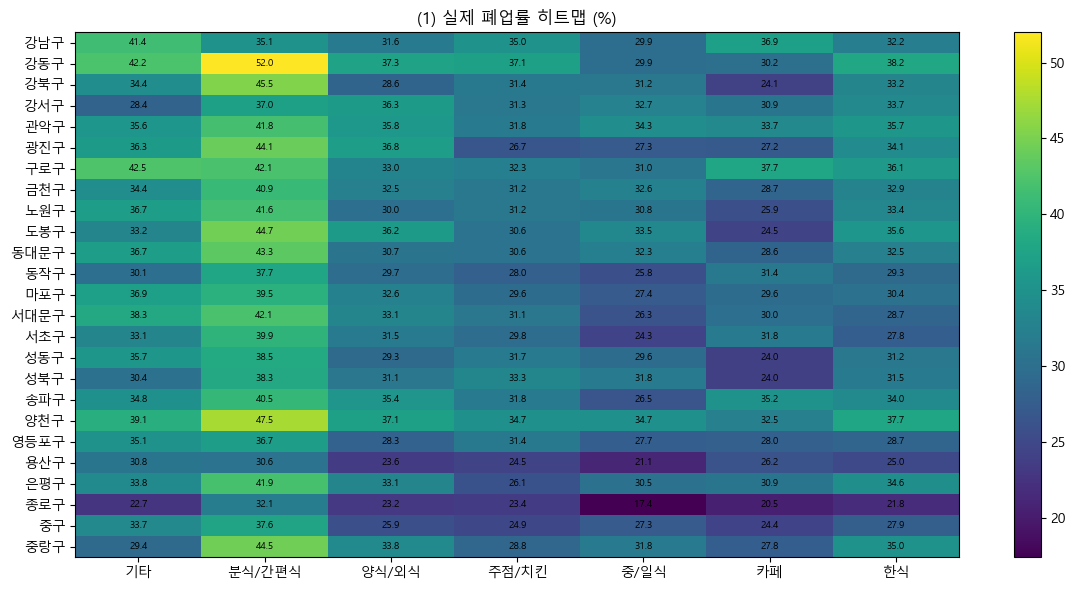

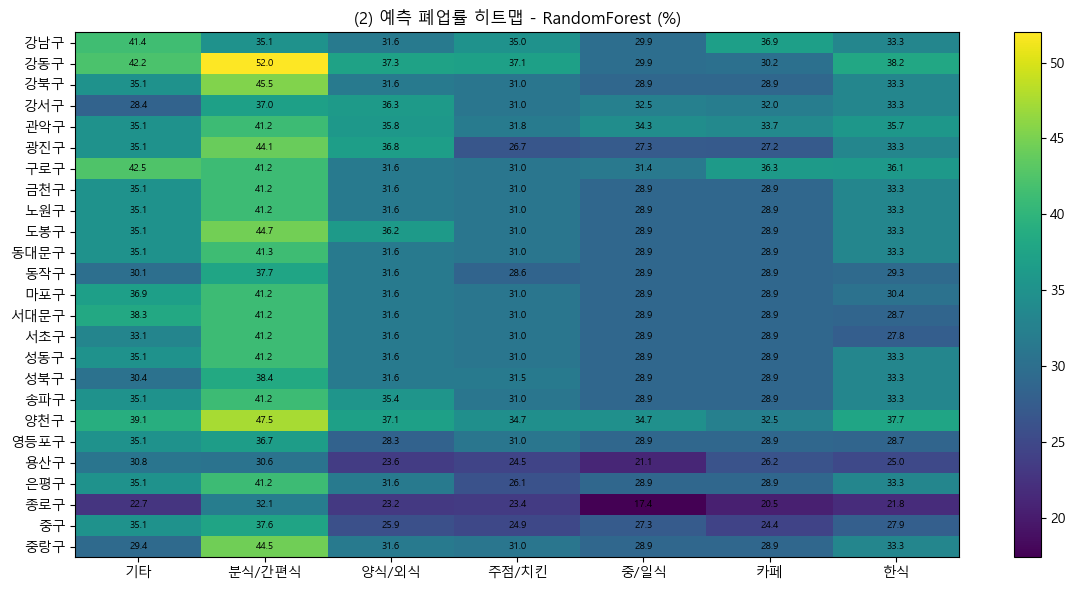

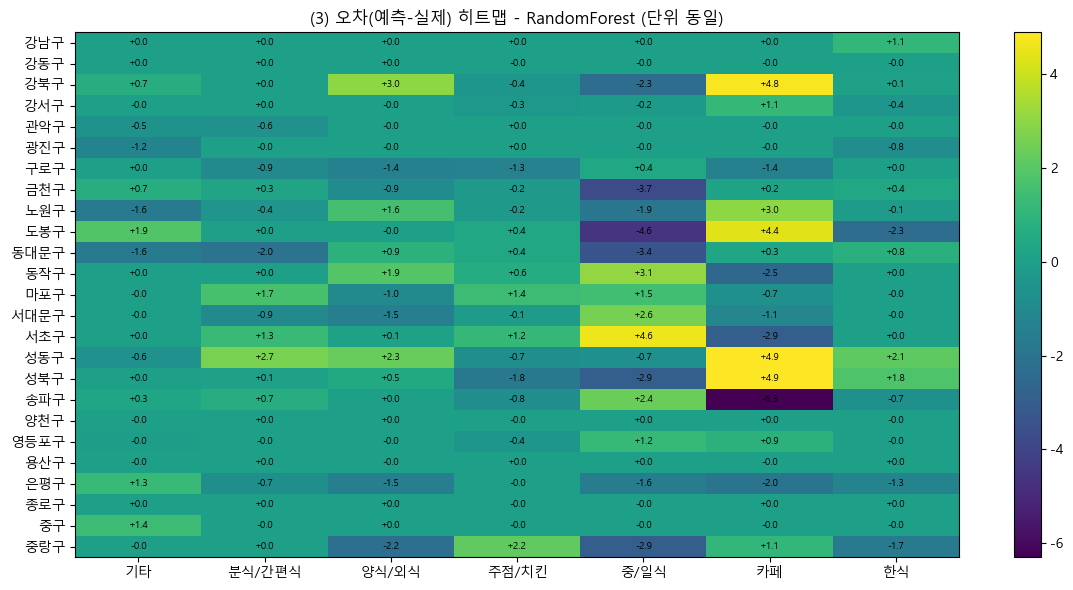

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# ===============================
# 0) (윈도우) 한글 폰트
# ===============================
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# ===============================
# 1) 데이터 로드 (업로드된 파일 경로)
# ===============================
path = "data/서울_일반음식점_전처리_폐업률머지.csv"
df = pd.read_csv(path, low_memory=False)

# 노트북에서 쓴 컬럼 기준
df = df.dropna(subset=["구", "업태_그룹", "폐업률_3년이내_pct"]).copy()

X = df[["업태_그룹", "구"]]
y = df["폐업률_3년이내_pct"].astype(float)

# y가 0~1이면 %로 바꿔서 보기 좋게 처리 (이미 %면 그대로)
scale = 100.0 if y.max() <= 1.5 else 1.0
y = y * scale

# ===============================
# 2) (네 노트북 그대로) 전처리 + RandomForest 모델
# ===============================
cat_cols = ["업태_그룹", "구"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

rf_model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", RandomForestRegressor(
            n_estimators=200,
            max_depth=15,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

# 네 노트북처럼 train/test split 후 학습
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
rf_model.fit(X_train, y_train)

# ===============================
# 3) 구×업태 조합 단위로 실제/예측/오차 만들기
# ===============================
g = (df.assign(_y=y)  # 스케일 적용된 y 사용
       .groupby(["구", "업태_그룹"], as_index=False)
       .agg(
           actual=("_y", "mean"),
           n=("_y", "size")
       ))

g["pred"] = rf_model.predict(g[["업태_그룹", "구"]])
g["error"] = g["pred"] - g["actual"]

pv_actual = g.pivot(index="구", columns="업태_그룹", values="actual")
pv_pred   = g.pivot(index="구", columns="업태_그룹", values="pred")
pv_err    = g.pivot(index="구", columns="업태_그룹", values="error")

# ===============================
# 4) 히트맵 함수 (matplotlib)
# ===============================
def plot_heatmap(pv, title, fmt="{:.1f}", annotate=True, figsize=(12, 6)):
    arr = pv.values.astype(float)
    masked = np.ma.masked_invalid(arr)

    plt.figure(figsize=figsize)
    plt.imshow(masked, aspect="auto")  # 기본 colormap
    plt.title(title)
    plt.yticks(range(len(pv.index)), pv.index)
    plt.xticks(range(len(pv.columns)), pv.columns, rotation=0)  # x축 가로
    plt.colorbar()

    if annotate:
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                if np.isfinite(arr[i, j]):
                    plt.text(j, i, fmt.format(arr[i, j]),
                             ha="center", va="center", fontsize=7)

    plt.tight_layout()
    plt.show()

# ===============================
# 5) 요청한 3개 히트맵
# ===============================
unit = "(%)" if scale == 1.0 else "(%로 변환)"
plot_heatmap(pv_actual, f"(1) 실제 폐업률 히트맵 {unit}", fmt="{:.1f}")
plot_heatmap(pv_pred,   f"(2) 예측 폐업률 히트맵 - RandomForest {unit}", fmt="{:.1f}")
plot_heatmap(pv_err,    f"(3) 오차(예측-실제) 히트맵 - RandomForest (단위 동일)", fmt="{:+.1f}")


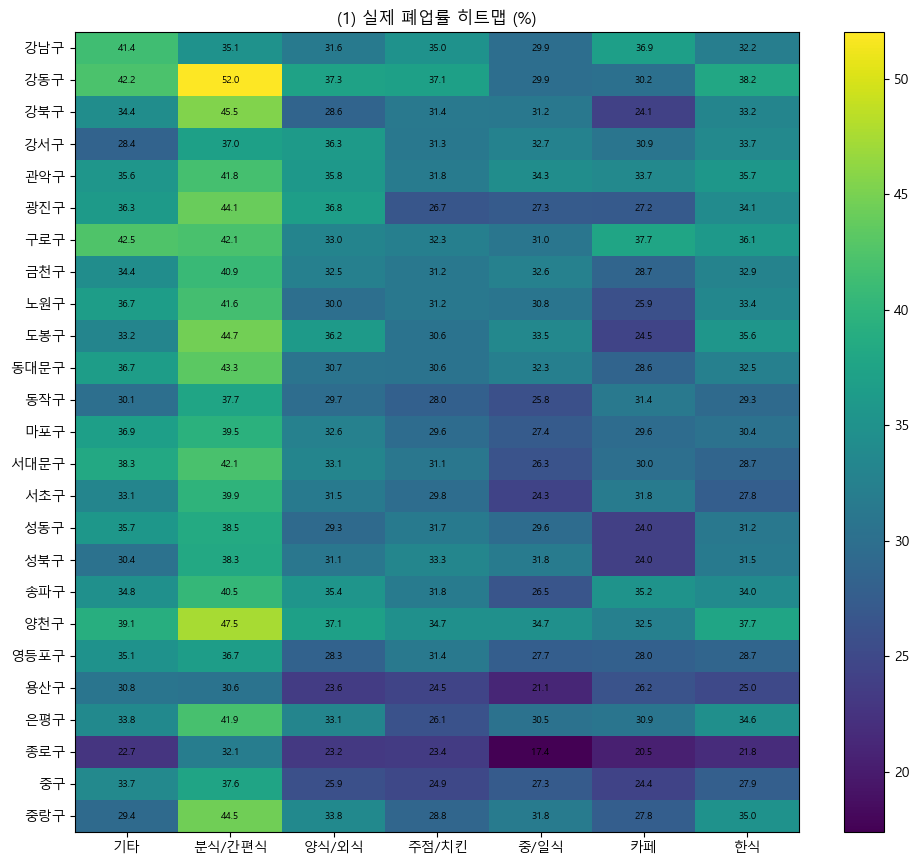

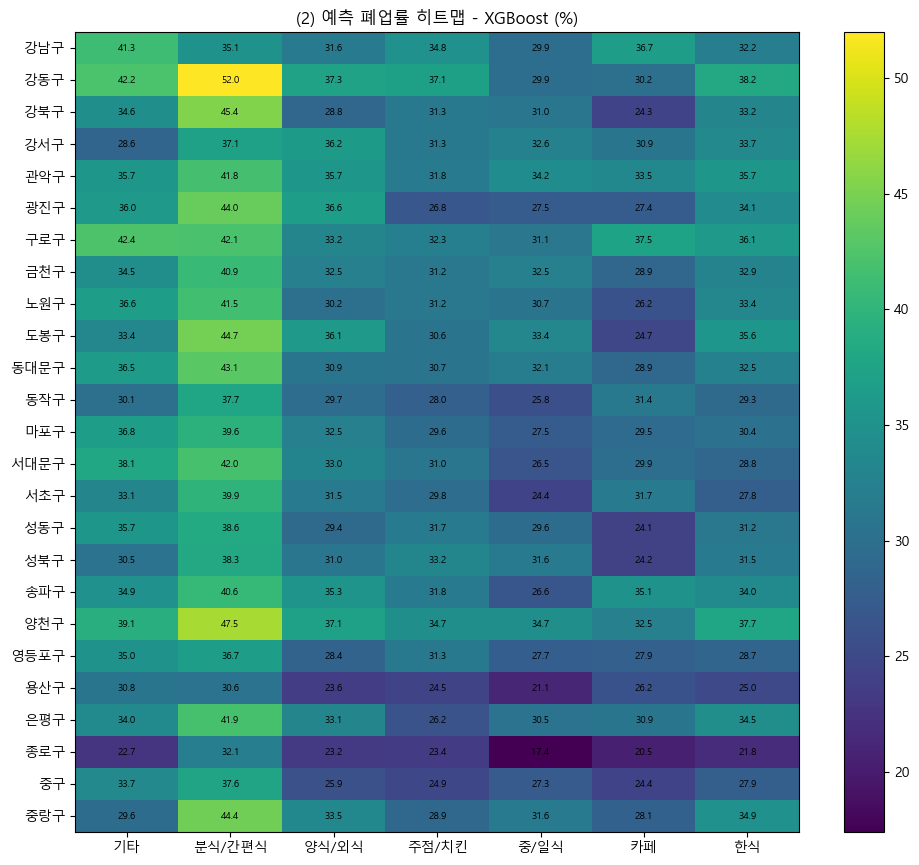

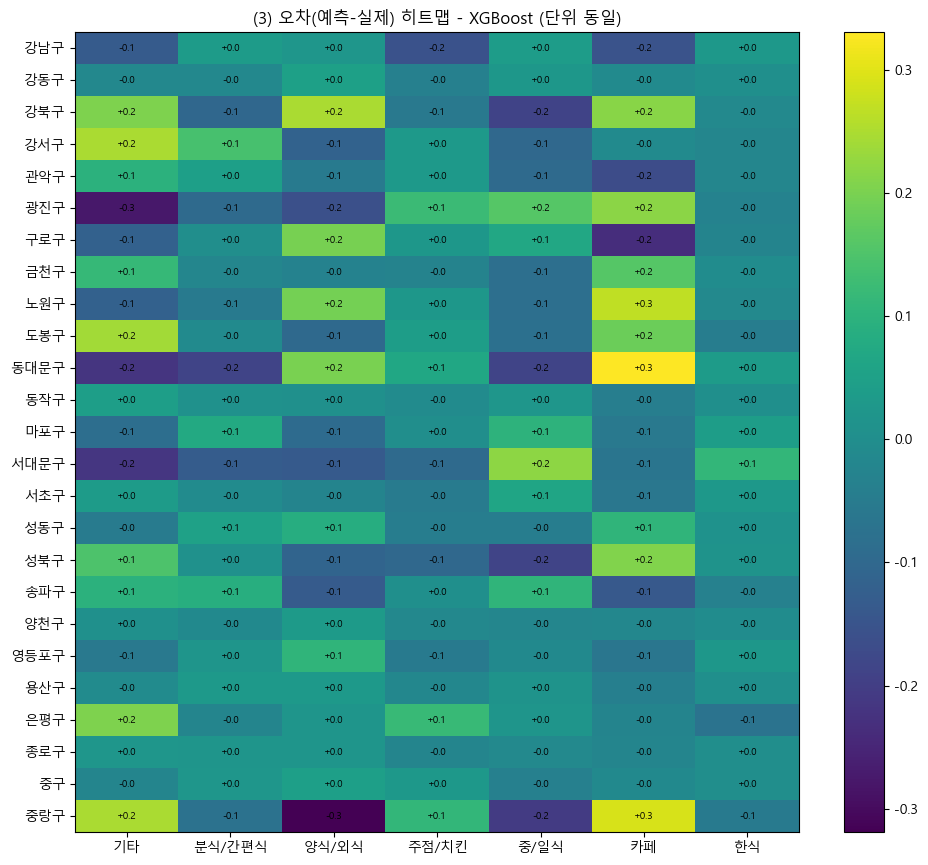

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# (필요시) pip install xgboost
from xgboost import XGBRegressor

# ===============================
# 0) (윈도우) 한글 폰트 (필요할 때만)
# ===============================
# plt.rcParams["font.family"] = "Malgun Gothic"
# plt.rcParams["axes.unicode_minus"] = False

# ===============================
# 1) 데이터 로드
# ===============================
path = "data/서울_일반음식점_전처리_폐업률머지.csv"  # 로컬이면 네 경로로 바꿔줘
df = pd.read_csv(path, low_memory=False)

df = df.dropna(subset=["구", "업태_그룹", "폐업률_3년이내_pct"]).copy()

X = df[["업태_그룹", "구"]].copy()
y_raw = df["폐업률_3년이내_pct"].astype(float).copy()

# y가 0~1이면 %로 변환(안전장치). 이미 %면 그대로
scale = 100.0 if y_raw.max() <= 1.5 else 1.0
y = y_raw * scale

# ===============================
# 2) (네 노트북 그대로) 전처리 + XGBoost
# ===============================
cat_cols = ["업태_그룹", "구"]

preprocess = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)]
)

xgb_model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", XGBRegressor(
            n_estimators=500,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
xgb_model.fit(X_train, y_train)

# ===============================
# 3) 구×업태 조합 단위 실제/예측/오차 만들기
# ===============================
g = (df.assign(_y=y)
       .groupby(["구", "업태_그룹"], as_index=False)
       .agg(
           actual=("_y", "mean"),   # 조합별 실제 평균(사실 값이 동일하면 mean=first)
           n=("_y", "size")
       ))

g["pred"]  = xgb_model.predict(g[["업태_그룹", "구"]])
g["error"] = g["pred"] - g["actual"]

pv_actual = g.pivot(index="구", columns="업태_그룹", values="actual")
pv_pred   = g.pivot(index="구", columns="업태_그룹", values="pred")
pv_err    = g.pivot(index="구", columns="업태_그룹", values="error")

# ===============================
# 4) 히트맵 그리기
# ===============================
def plot_heatmap(pv, title, fmt="{:.1f}", annotate=True):
    arr = pv.values.astype(float)
    masked = np.ma.masked_invalid(arr)

    n_rows, n_cols = arr.shape
    figsize = (max(10, n_cols * 0.6), max(5, n_rows * 0.35))

    plt.figure(figsize=figsize)
    plt.imshow(masked, aspect="auto")   # 기본 colormap
    plt.title(title)
    plt.yticks(range(len(pv.index)), pv.index)
    plt.xticks(range(len(pv.columns)), pv.columns, rotation=0)  # x축 가로
    plt.colorbar()

    if annotate:
        fs = 7 if (n_rows * n_cols) <= 400 else 5
        for i in range(n_rows):
            for j in range(n_cols):
                v = arr[i, j]
                if np.isfinite(v):
                    plt.text(j, i, fmt.format(v), ha="center", va="center", fontsize=fs)

    plt.tight_layout()
    plt.show()

# 너무 촘촘하면 자동으로 숫자 표시 끄기
auto_annotate = (pv_actual.shape[0] * pv_actual.shape[1]) <= 450
unit = "(%)" if scale == 1.0 else "(%로 변환)"

plot_heatmap(pv_actual, f"(1) 실제 폐업률 히트맵 {unit}", fmt="{:.1f}", annotate=auto_annotate)
plot_heatmap(pv_pred,   f"(2) 예측 폐업률 히트맵 - XGBoost {unit}", fmt="{:.1f}", annotate=auto_annotate)
plot_heatmap(pv_err,    f"(3) 오차(예측-실제) 히트맵 - XGBoost (단위 동일)", fmt="{:+.1f}", annotate=auto_annotate)


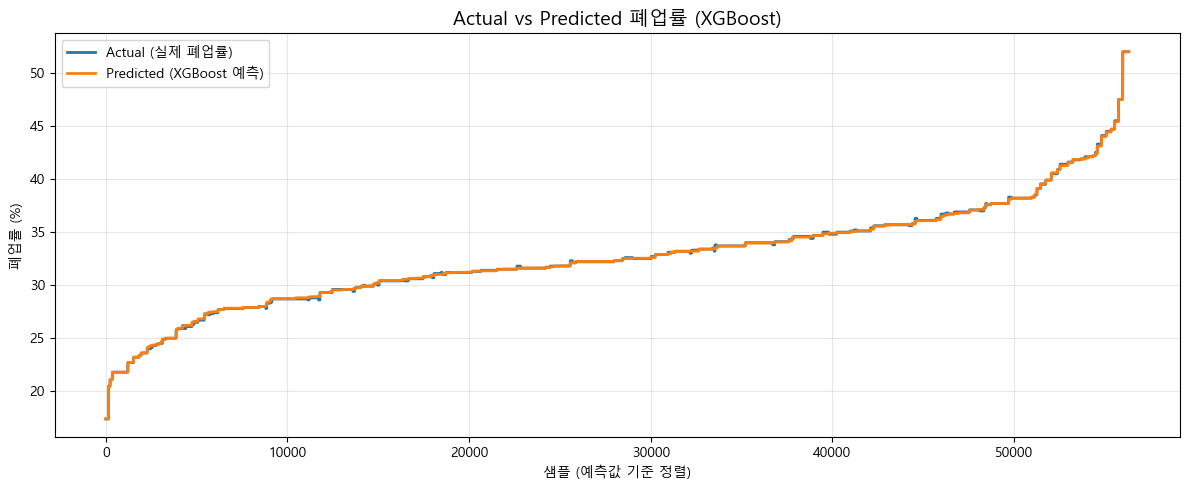

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# ===============================
# 1) 데이터 로드
# ===============================
df = pd.read_csv(
    "data/서울_일반음식점_전처리_폐업률머지.csv",
    low_memory=False
)

df = df.dropna(subset=["구", "업태_그룹", "폐업률_3년이내_pct"]).copy()

X = df[["업태_그룹", "구"]]
y = df["폐업률_3년이내_pct"].astype(float)

# % 스케일 정리
if y.max() <= 1.5:
    y = y * 100

# ===============================
# 2) XGBoost (네가 쓴 방식 그대로)
# ===============================
preprocess = ColumnTransformer(
    [("cat", OneHotEncoder(handle_unknown="ignore"), ["업태_그룹", "구"])]
)

model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("xgb", XGBRegressor(
            n_estimators=500,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

# ===============================
# 3) 예측
# ===============================
y_pred = model.predict(X_test)

plot_df = pd.DataFrame({
    "actual": y_test.values,
    "pred": y_pred
})

# 👉 예측값 기준 정렬 (선그래프 핵심)
plot_df = plot_df.sort_values("pred").reset_index(drop=True)

# ===============================
# 4) 선그래프 시각화
# ===============================
plt.figure(figsize=(12, 5))

plt.plot(
    plot_df["actual"].values,
    label="Actual (실제 폐업률)",
    linewidth=2
)

plt.plot(
    plot_df["pred"].values,
    label="Predicted (XGBoost 예측)",
    linewidth=2
)

plt.title("Actual vs Predicted 폐업률 (XGBoost)", fontsize=14)
plt.xlabel("샘플 (예측값 기준 정렬)")
plt.ylabel("폐업률 (%)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


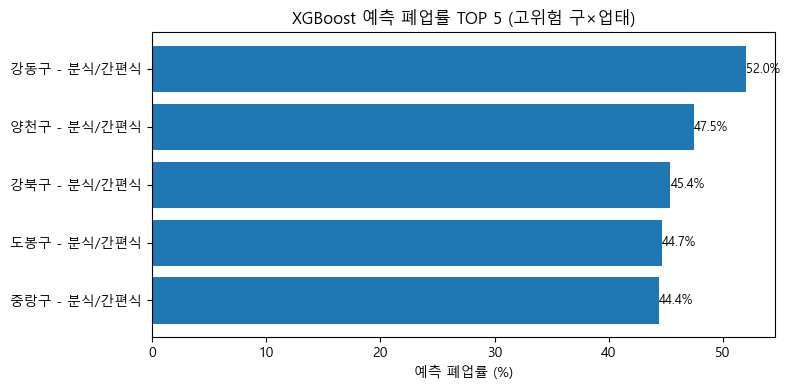

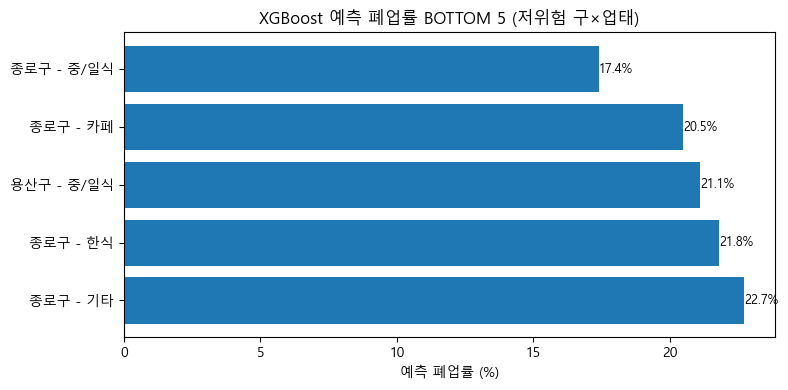

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# 1) 데이터 + XGBoost 예측값
#    (앞에서 학습한 model 그대로 사용한다고 가정)
# ===============================
df = pd.read_csv(
    "data/서울_일반음식점_전처리_폐업률머지.csv",
    low_memory=False
)

df = df.dropna(subset=["구", "업태_그룹", "폐업률_3년이내_pct"]).copy()

X_all = df[["업태_그룹", "구"]]
y_raw = df["폐업률_3년이내_pct"].astype(float)

# % 스케일 보정
if y_raw.max() <= 1.5:
    y = y_raw * 100
else:
    y = y_raw

# ▶ XGBoost 예측 (이미 학습된 model 사용)
df["pred"] = model.predict(X_all)
df["actual"] = y

# ===============================
# 2) 구 × 업태 조합 단위로 집계
# ===============================
g = (df.groupby(["구", "업태_그룹"], as_index=False)
       .agg(
           pred=("pred", "mean"),
           actual=("actual", "mean"),
           n=("actual", "size")
       ))

# ===============================
# 3) TOP5 / BOTTOM5 추출
# ===============================
top5_high = g.sort_values("pred", ascending=False).head(5)
top5_low  = g.sort_values("pred", ascending=True).head(5)

# ===============================
# 4) 막대그래프 함수
# ===============================
def plot_bar(df, title):
    labels = df["구"] + " - " + df["업태_그룹"]

    plt.figure(figsize=(8, 4))
    plt.barh(labels, df["pred"])
    plt.xlabel("예측 폐업률 (%)")
    plt.title(title)

    # 값 표시
    for i, v in enumerate(df["pred"]):
        plt.text(v, i, f"{v:.1f}%", va="center", fontsize=9)

    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# ===============================
# 5) 시각화
# ===============================
plot_bar(top5_high, "XGBoost 예측 폐업률 TOP 5 (고위험 구×업태)")
plot_bar(top5_low,  "XGBoost 예측 폐업률 BOTTOM 5 (저위험 구×업태)")
